In [191]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import timedelta

In [192]:
#folder = "3.14/origin/"
#folder = "3.14/hpcc/"
folder = "3.19_100G/"
starttime = 0
dt = 0.012

In [193]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [194]:
def get_receive_packets(df, src_addr):
    df_out = df.loc[df["events"].isin(["r"])]
    df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
    df_out = df_out.loc[df_out["dst_addr"].isin([5.0, 5.1, 5.2, 5.3])]
    df_out = df_out.loc[df_out["to_node"].isin([5])]
    df_out = df_out.loc[df_out["src_addr"].isin(src_addr)]
    return df_out

In [195]:
raw_data = read_out_tr(folder, "HRCC.tr")
#raw_data = read_out_tr(folder, "AFQ10.tr")
#raw_data = read_out_tr(folder, "AFQ100.tr")
#raw_data = read_out_tr(folder, "AFQ1000.tr")
#raw_data = read_out_tr(folder, "DropTail.tr")
#raw_data = read_out_tr(folder, "out.tr")

r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])
r_event_in_dst_1 = get_receive_packets(raw_data, [1.0, 1.1, 1.2, 1.3])
r_event_in_dst_2 = get_receive_packets(raw_data, [2.0, 2.1, 2.2, 2.3])
r_event_in_dst_3 = get_receive_packets(raw_data, [3.0, 3.1, 3.2, 3.3])

In [196]:
#raw_data = read_out_tr(folder, "HRCC_one_flow.tr")
#r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])

In [197]:
r_event_in_dst_1

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
20983,r,0.001507,4,5,tcp,40,-------,1,1.0,5.1,0,3487
21199,r,0.001521,4,5,tcp,1040,-------,1,1.0,5.1,1,3521
21223,r,0.001523,4,5,tcp,1040,-------,1,1.0,5.1,2,3522
21435,r,0.001537,4,5,tcp,1040,-------,1,1.0,5.1,3,3556
21459,r,0.001539,4,5,tcp,1040,-------,1,1.0,5.1,4,3557
21471,r,0.001540,4,5,tcp,1040,-------,1,1.0,5.1,5,3561
21483,r,0.001541,4,5,tcp,1040,-------,1,1.0,5.1,6,3562
21679,r,0.001553,4,5,tcp,1040,-------,1,1.0,5.1,7,3596
21703,r,0.001555,4,5,tcp,1040,-------,1,1.0,5.1,8,3597
21715,r,0.001555,4,5,tcp,1040,-------,1,1.0,5.1,9,3601


In [198]:
r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_1['ts'] = r_event_in_dst_1['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_2['ts'] = r_event_in_dst_2['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_3['ts'] = r_event_in_dst_3['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [199]:
#r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [200]:
#pkt_size_series = pd.Series(r_event_in_dst_1['pkt_size'], index=r_event_in_dst['ts'])

In [201]:
# H       hourly frequency
# T, min  minutely frequency
# S       secondly frequency
# L, ms   milliseonds
# U, us   microseconds
# N       nanoseconds
microseconds = 12
shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_1 = r_event_in_dst_1[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_2 = r_event_in_dst_2[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_3 = r_event_in_dst_3[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_3['throughtput'] = shortTh_3['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

shortTh_0.head()

,pkt_size,throughtput
ts,,
00:00:00.000016,40,0.026667
00:00:00.000028,2080,1.386667
00:00:00.000040,4160,2.773333
00:00:00.000052,8320,5.546667
00:00:00.000064,10400,6.933333


In [202]:
#microseconds = 12
#shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
#shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

In [203]:
shortTh_1.head()

,pkt_size,throughtput
ts,,
00:00:00.001507,40,0.026667
00:00:00.001519,2080,1.386667
00:00:00.001531,4160,2.773333
00:00:00.001543,1040,0.693333
00:00:00.001555,7280,4.853333


In [204]:
res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
res_0.index = res_0.index / timedelta(seconds=1)

res_1 = shortTh_1[['throughtput']].unstack()['throughtput'].T
res_1.index = res_1.index / timedelta(seconds=1)

res_2 = shortTh_2[['throughtput']].unstack()['throughtput'].T
res_2.index = res_2.index / timedelta(seconds=1)

res_3 = shortTh_3[['throughtput']].unstack()['throughtput'].T
res_3.index = res_3.index / timedelta(seconds=1)



In [205]:
#res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
#res_0.index = res_0.index / timedelta(seconds=1)
res_1

ts
0.001507    0.026667
0.001519    1.386667
0.001531    2.773333
0.001543    0.693333
0.001555    4.853333
0.001567    4.853333
0.001579    4.160000
0.001591    6.240000
0.001603    4.853333
0.001615    4.160000
0.001627    5.546667
0.001639    4.853333
0.001651    5.546667
0.001663    4.853333
0.001675    5.546667
0.001687    4.853333
0.001699    4.160000
0.001711    4.853333
0.001723    6.240000
0.001735    4.853333
0.001747    3.466667
0.001759    6.240000
0.001771    4.853333
0.001783    4.853333
0.001795    4.853333
0.001807    5.546667
0.001819    4.853333
0.001831    4.160000
0.001843    5.546667
0.001855    5.546667
              ...   
0.008683    4.853333
0.008695    3.466667
0.008707    6.240000
0.008719    4.853333
0.008731    5.546667
0.008743    4.160000
0.008755    5.546667
0.008767    4.853333
0.008779    4.160000
0.008791    4.853333
0.008803    6.240000
0.008815    4.853333
0.008827    3.466667
0.008839    6.240000
0.008851    5.546667
0.008863    4.160000
0.008875  

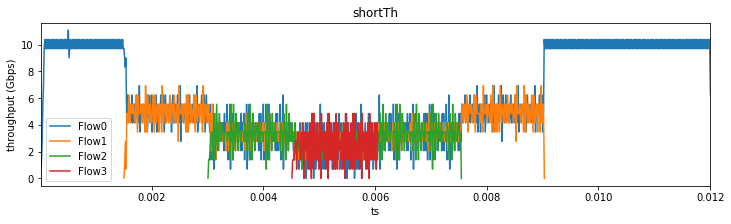

In [206]:
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')
res_3.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow3')


plt.show()

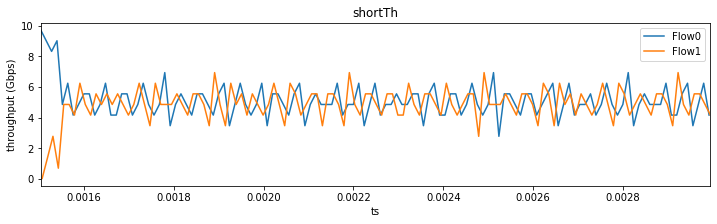

In [207]:
# 2 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')


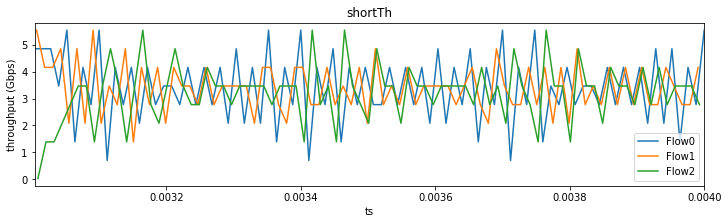

In [208]:
# 3 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')


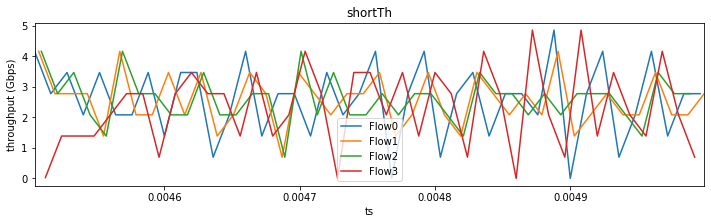

In [209]:
# 4 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')
res_3[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow3')
